In [3]:
# Loading the libraries

import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

In [4]:


Data=pd.read_csv('/content/telecom.csv')# Importing the dataframe
pd.set_option('display.max_columns',25)# this helps to view every column
Data.head()# to view rows


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# Removing CustomerID as it is of no use
Data.drop('customerID',axis=1,inplace=True)

In [6]:
# rows and columns the data has

Data.shape

(7043, 20)

In [7]:
# To see the basic data types of each column

Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


 # From the above we can see that total charges is dispalyed as objects whereas it is a integer.

# So we are converting it to a numeric column.

In [8]:
Data.TotalCharges = pd.to_numeric(Data.TotalCharges, errors='coerce')

In [9]:
# Checking whethere there is a null value in the data

Data.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

We can see that total charges has eleven NaN values.
Since we have around 7000 records we can remove the null values.

In [10]:
# Removing the null values

Data.dropna(inplace=True)

In [11]:
# Converting the String churn column in to binary by replacing Yes with 1 and No with 0

Data['Churn'].replace("Yes",1,inplace=True)
Data['Churn'].replace("No",0,inplace=True)


In [12]:
# Converting the categorical columns in to binary using get dummies

Data1=pd.get_dummies(Data)
Data1.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,0,1,...,1,0,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,0,0,...,1,0,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,0,0,...,1,0,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,0,1,...,1,0,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,0,0,...,1,0,0,1,0,0,0,1,0,0,1,0


In [13]:
 Data1.replace({True: 1, False: 0})

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,0,1,...,1,0,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,0,0,...,1,0,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,0,0,...,1,0,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,0,1,...,1,0,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,0,0,...,1,0,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,0,1,0,1,0,1,0,...,0,0,1,0,1,0,0,1,0,0,0,1
7039,0,72,103.20,7362.90,0,1,0,0,1,0,1,0,...,0,0,1,0,1,0,0,1,0,1,0,0
7040,0,11,29.60,346.45,0,1,0,0,1,0,1,1,...,1,0,0,1,0,0,0,1,0,0,1,0
7041,1,4,74.40,306.60,1,0,1,0,1,1,0,0,...,1,0,0,1,0,0,0,1,0,0,0,1


<Axes: >

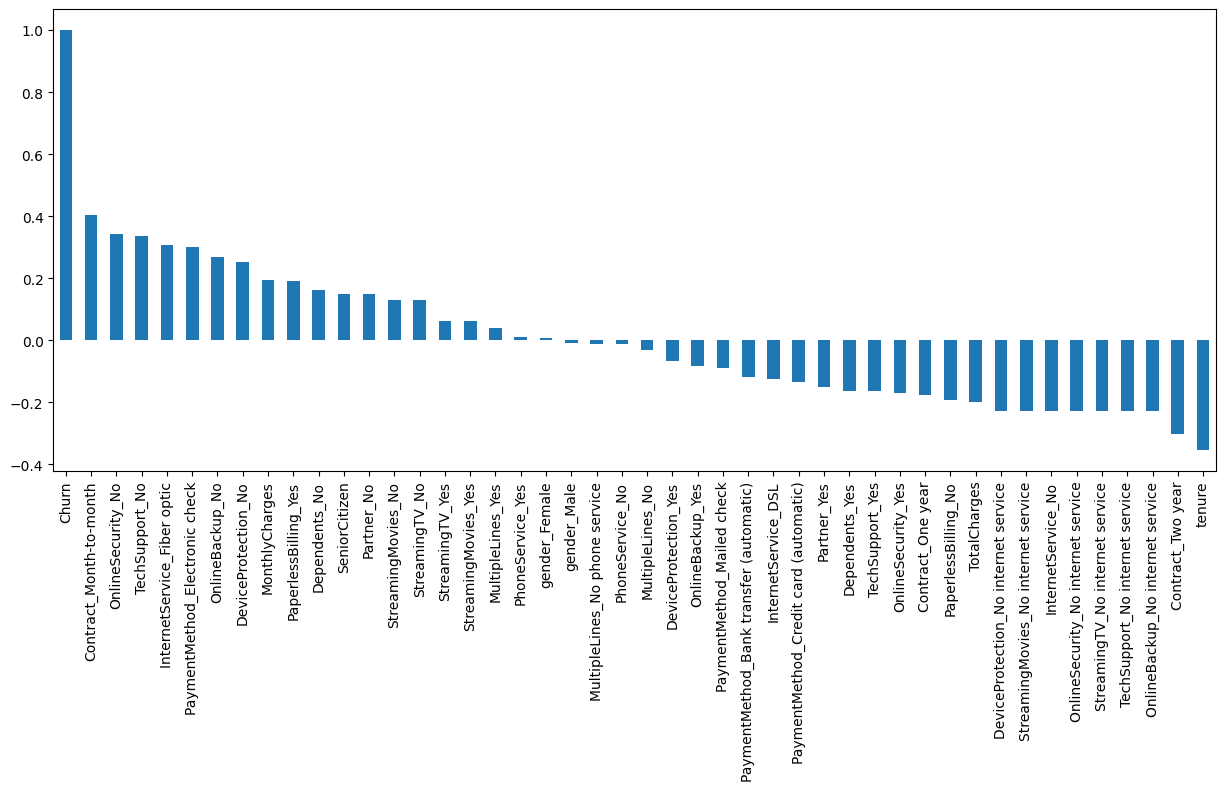

In [14]:
plt.figure(figsize=(15,6))
Data1.corr()['Churn'].sort_values(ascending=False).plot.bar()

We can see that month to month contract and absence of Online Security and Tech support is strongly positively correlated with the traget variable Churn and we also got the same info while doing visual anlaysis of the data in Tableau.

Also we can see that Tenure and Two Year contract is negatively correlated with target variable Churn.

With basic Visual Analytics done in Tableau and Basic Exploration done here we are heading to model building and evaluation.

Text(0.5, 1.0, 'Count of TARGET Variable')

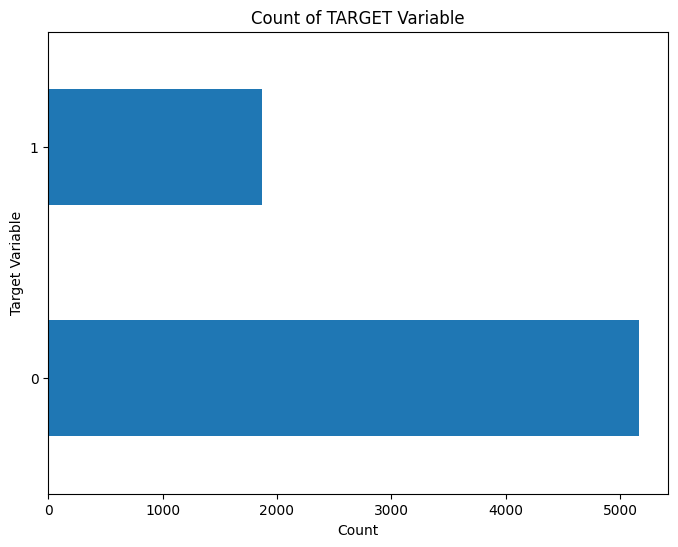

In [15]:
Data1['Churn'].value_counts().plot(kind='barh',figsize=(8,6))
plt.xlabel("Count")
plt.ylabel("Target Variable")
plt.title("Count of TARGET Variable")

In [16]:
Data1['Churn'].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

# here 0= Not churn and 1= Churned
# but these numbers are not making sense lets make a sense out of it  

In [17]:
len(Data1['Churn'])

7032

In [18]:
100*Data1['Churn'].value_counts()/len(Data1['Churn'])

0    73.421502
1    26.578498
Name: Churn, dtype: float64

Here we can infer that only approx 26% of customers churn where as 73% of customers continue with hteir isp

In [19]:
Data1.isnull().sum()

SeniorCitizen                              0
tenure                                     0
MonthlyCharges                             0
TotalCharges                               0
Churn                                      0
gender_Female                              0
gender_Male                                0
Partner_No                                 0
Partner_Yes                                0
Dependents_No                              0
Dependents_Yes                             0
PhoneService_No                            0
PhoneService_Yes                           0
MultipleLines_No                           0
MultipleLines_No phone service             0
MultipleLines_Yes                          0
InternetService_DSL                        0
InternetService_Fiber optic                0
InternetService_No                         0
OnlineSecurity_No                          0
OnlineSecurity_No internet service         0
OnlineSecurity_Yes                         0
OnlineBack

no null values great!!

# lets plot every column with respect to churn
## this is part of data exploration

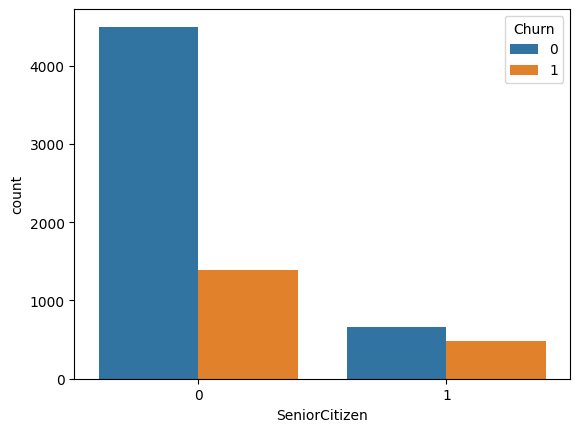

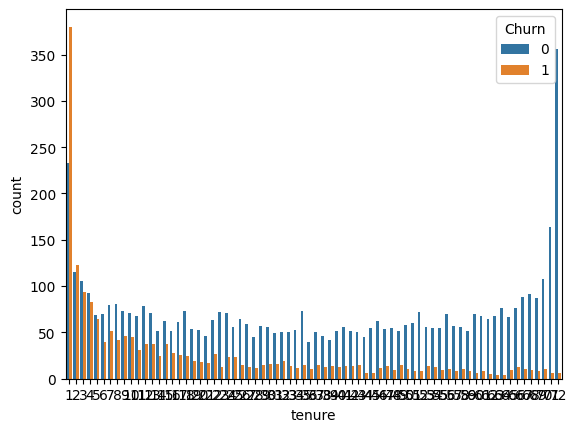

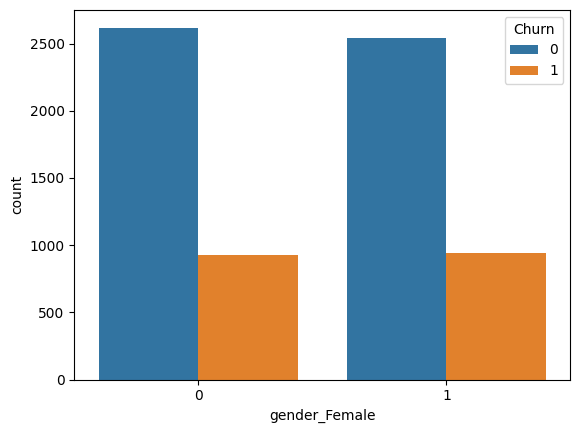

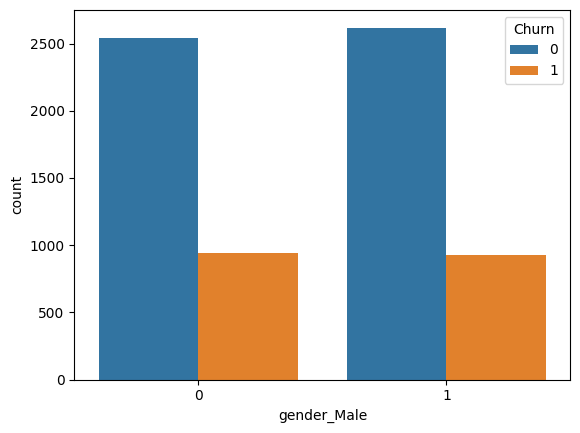

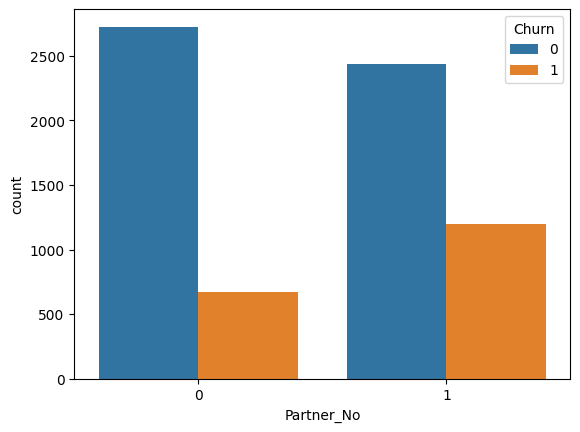

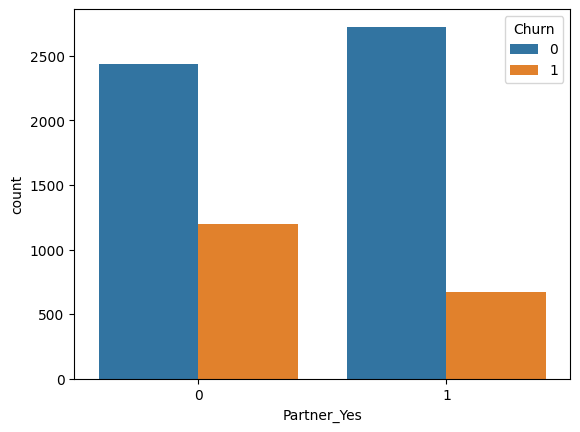

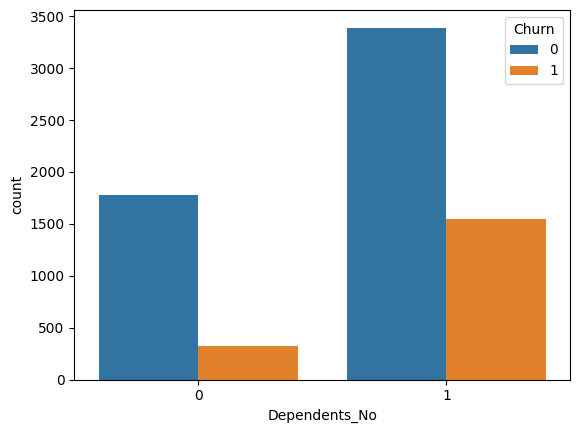

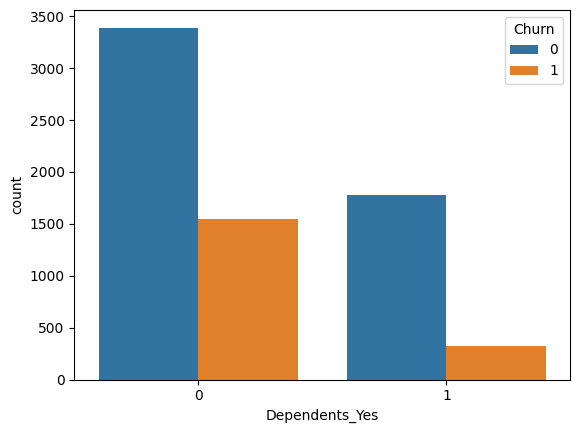

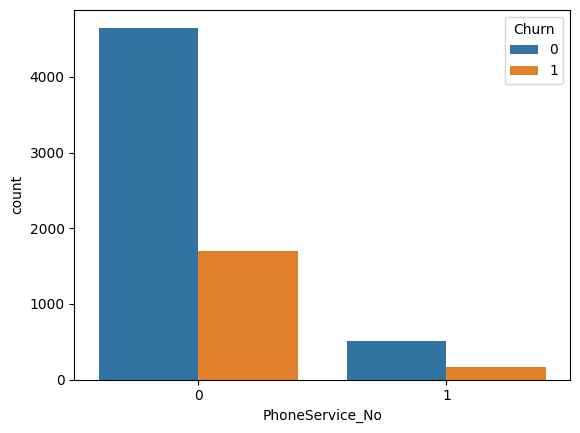

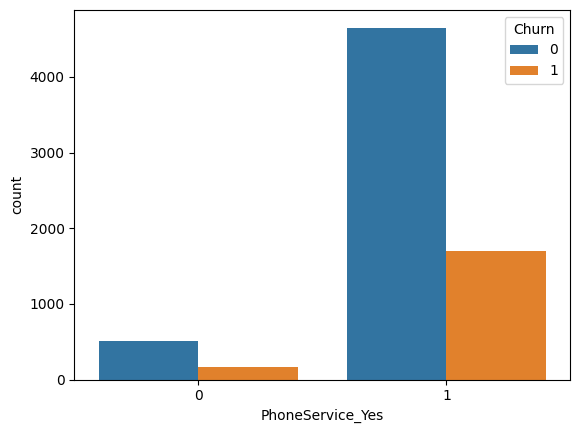

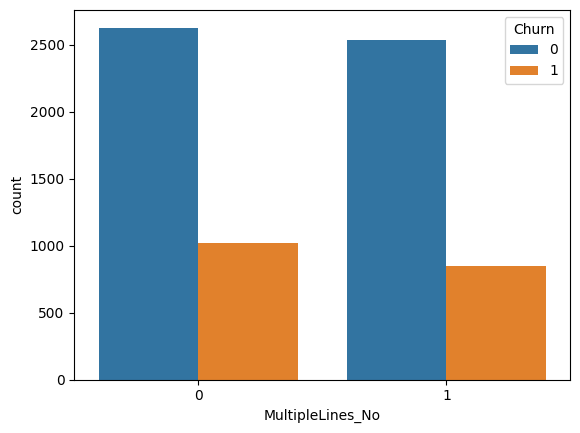

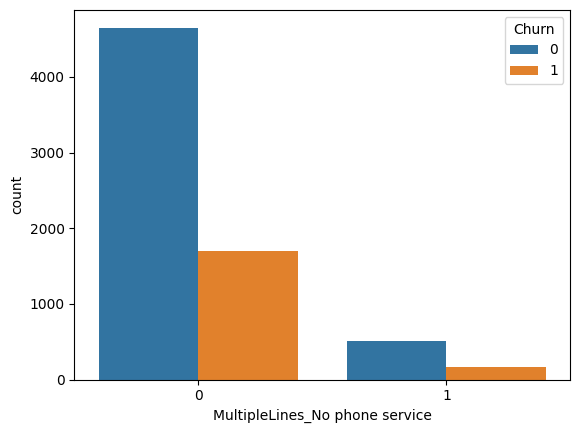

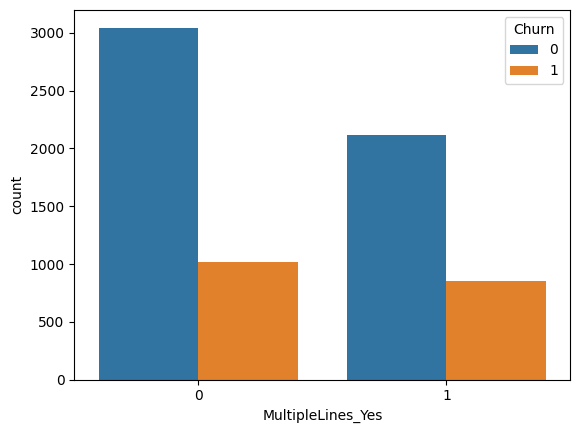

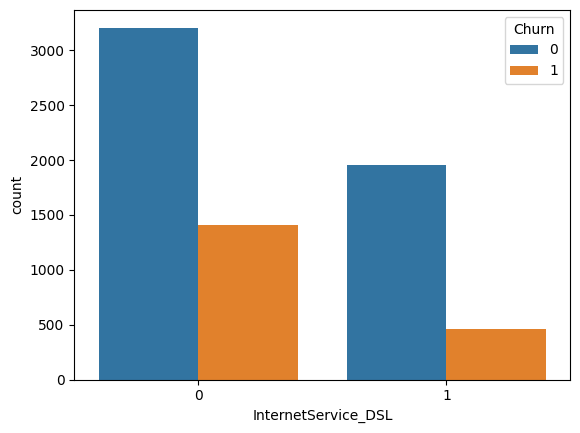

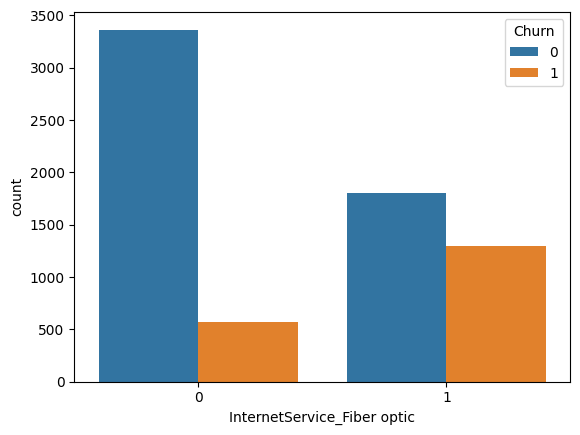

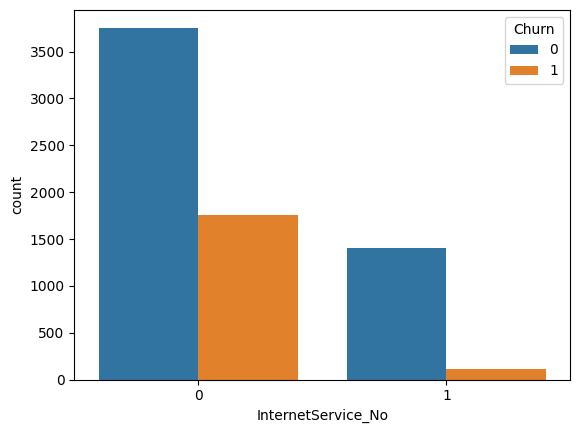

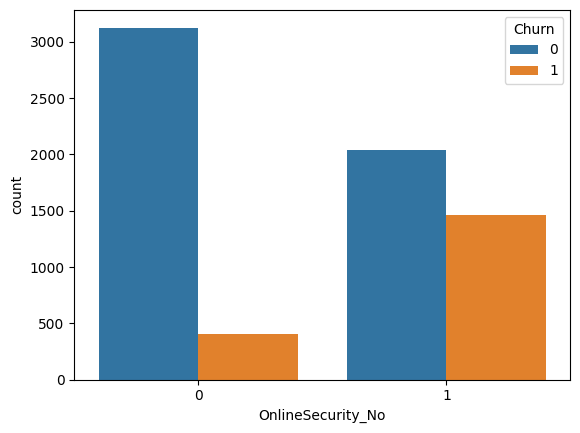

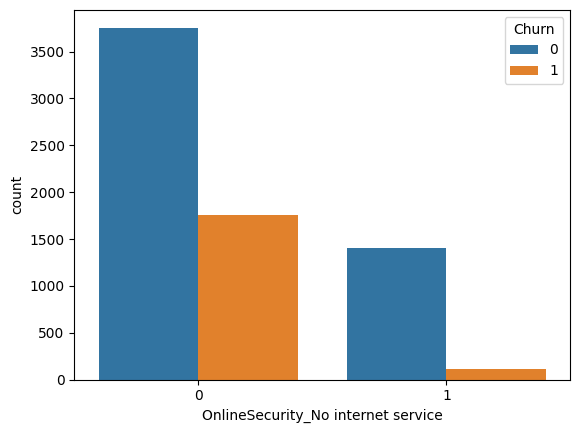

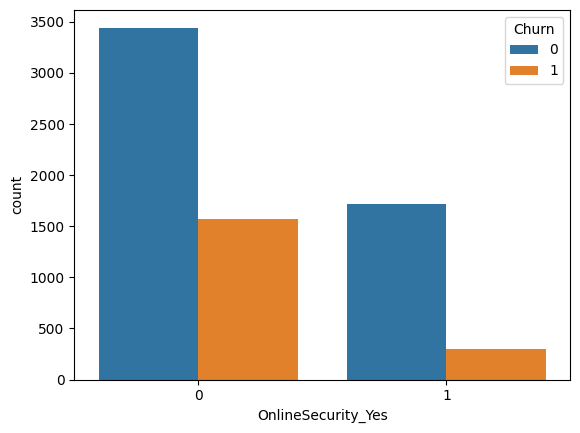

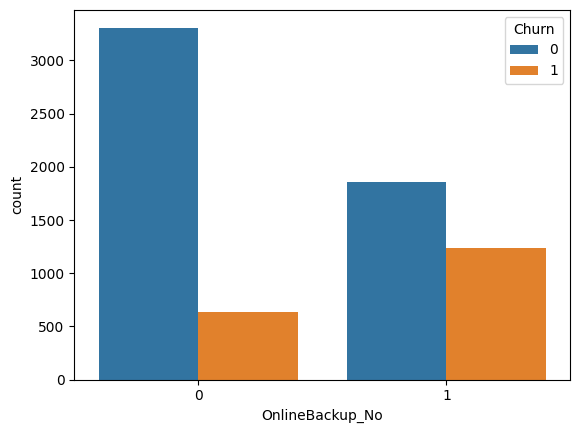

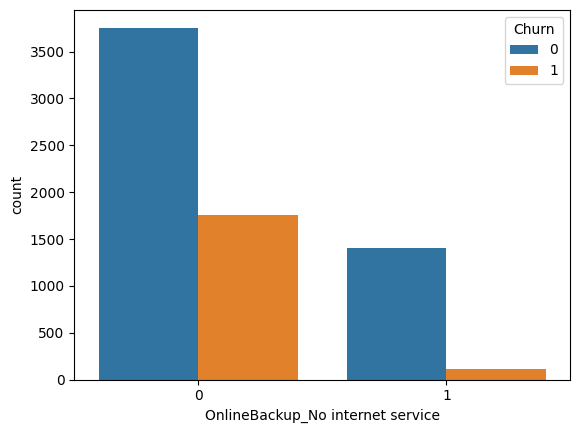

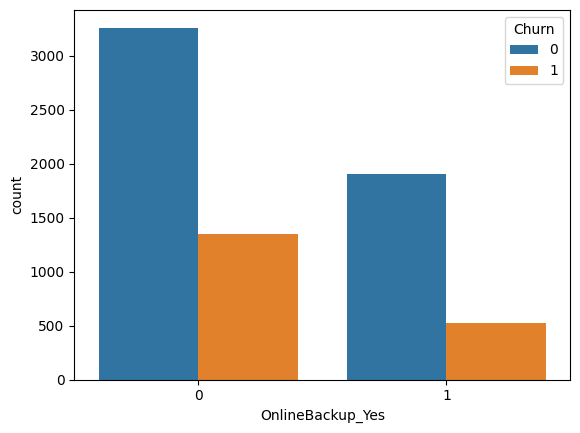

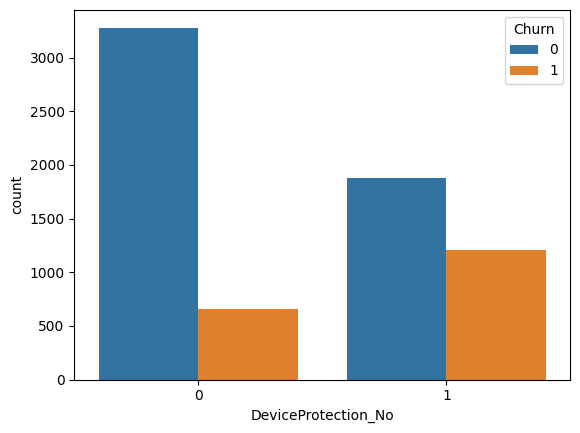

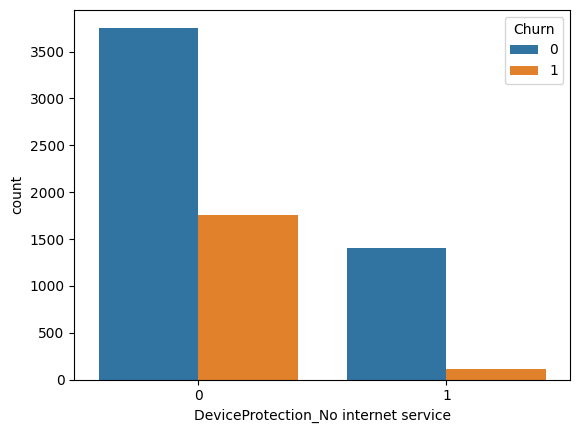

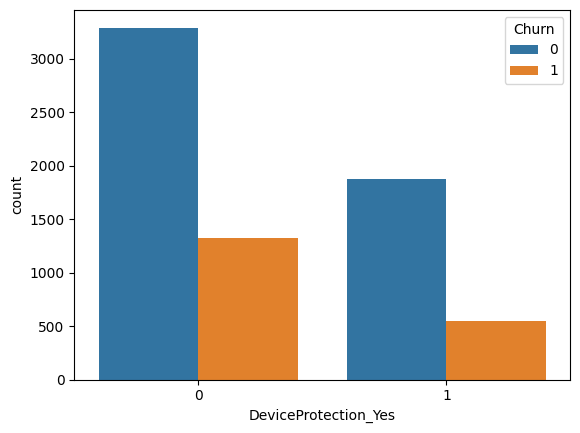

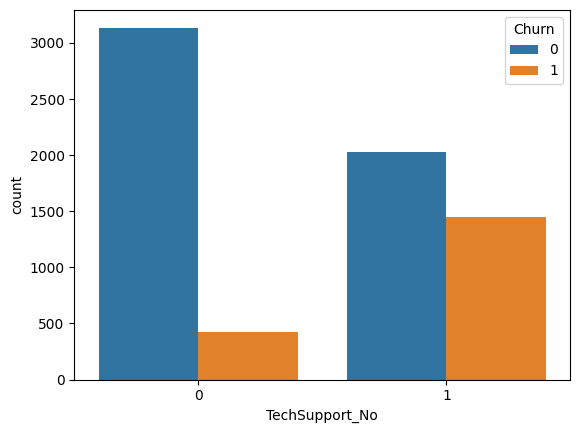

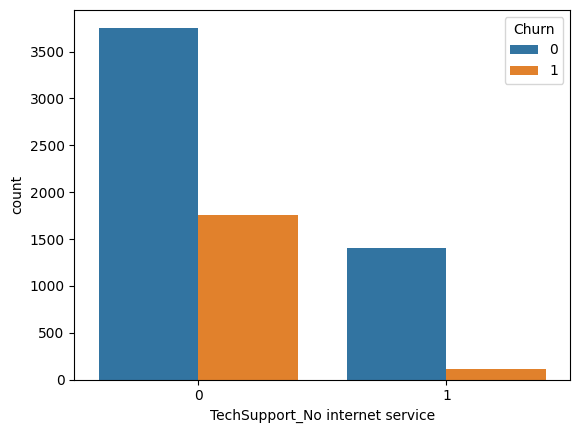

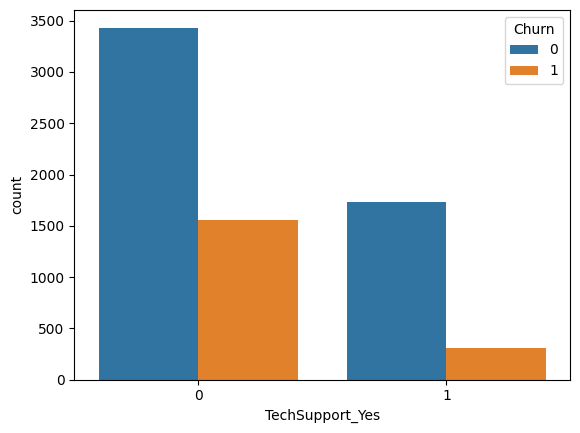

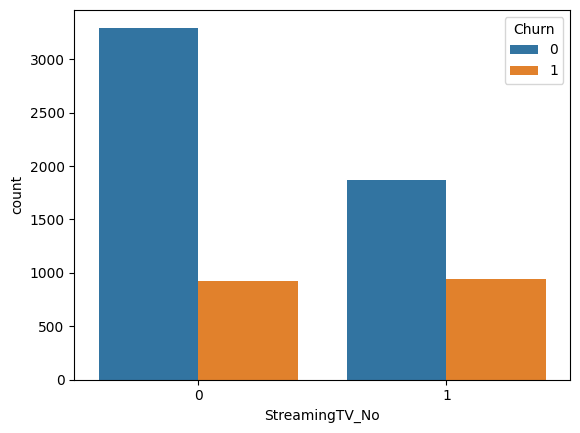

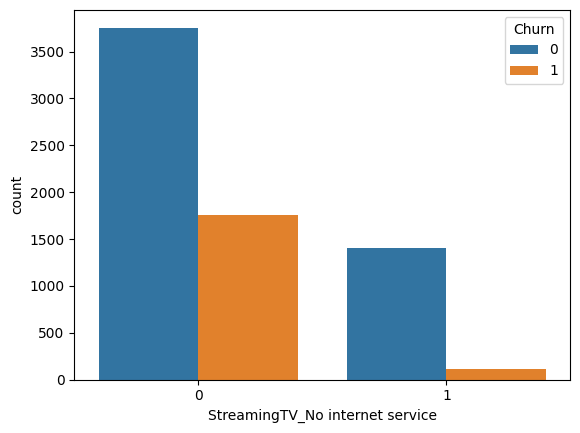

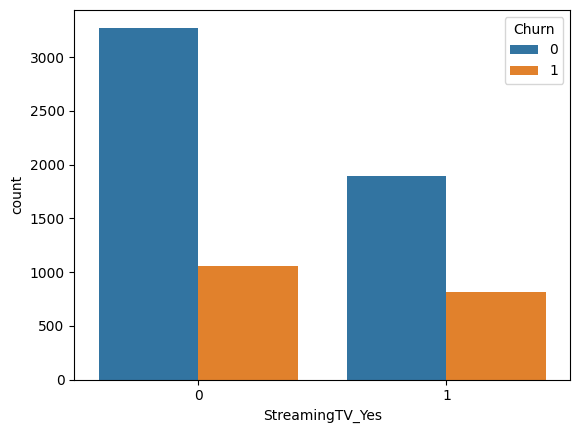

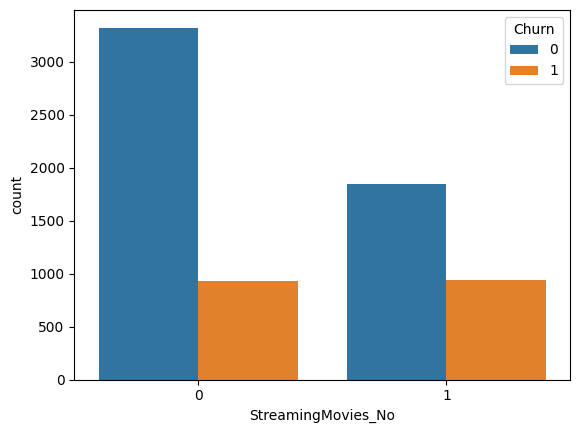

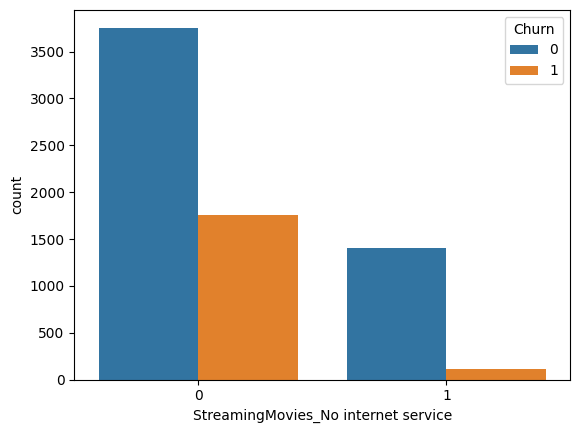

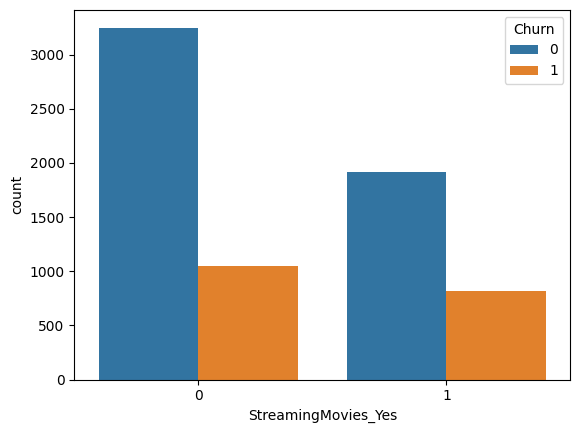

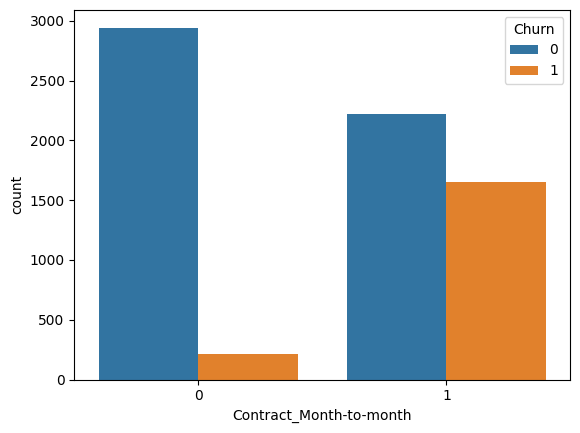

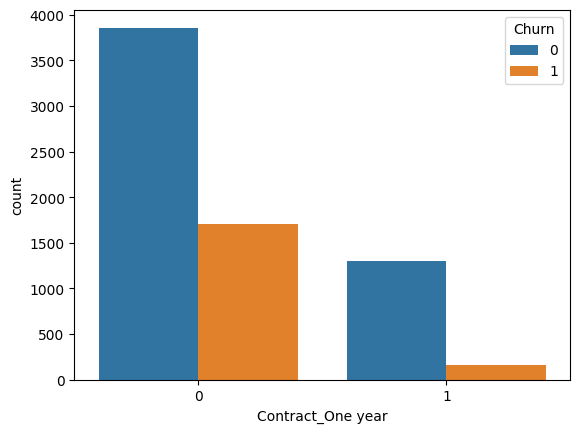

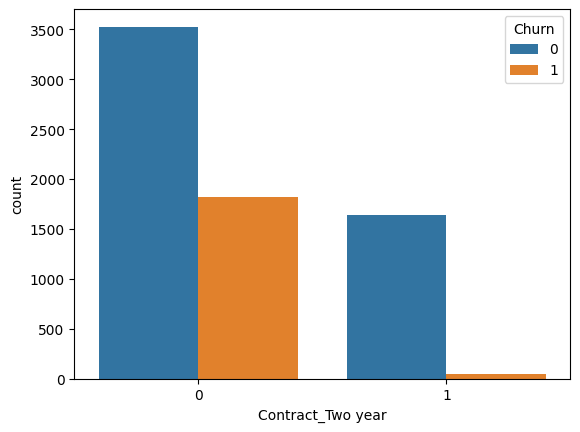

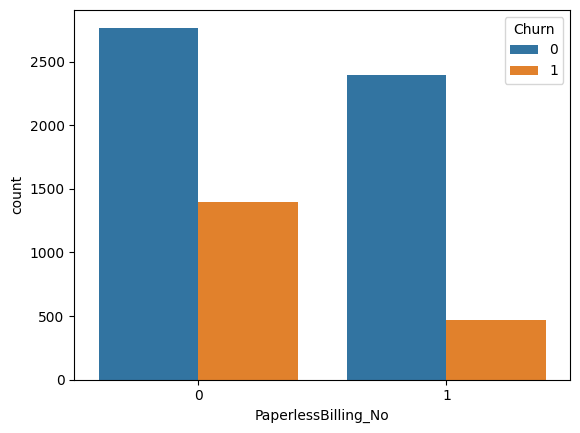

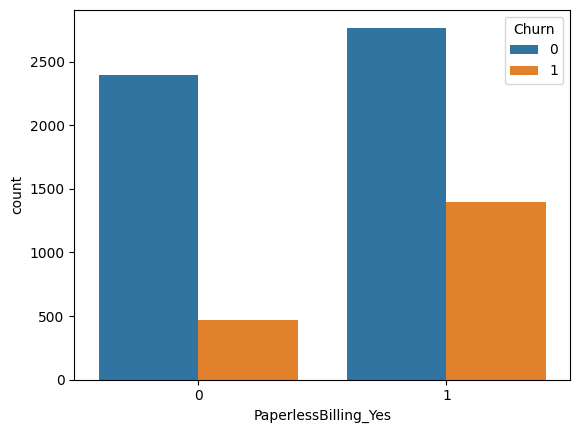

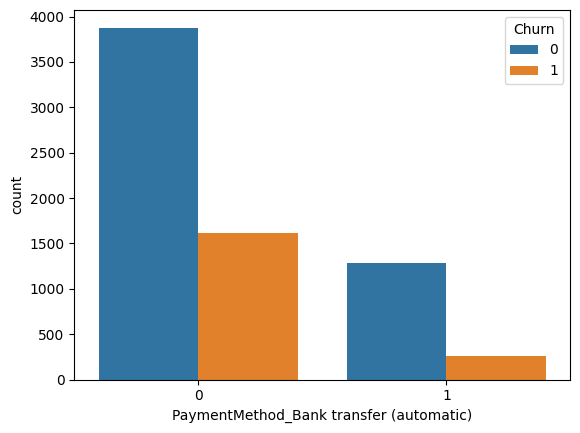

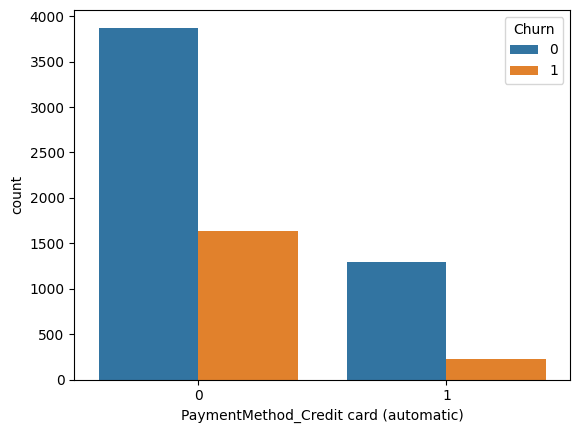

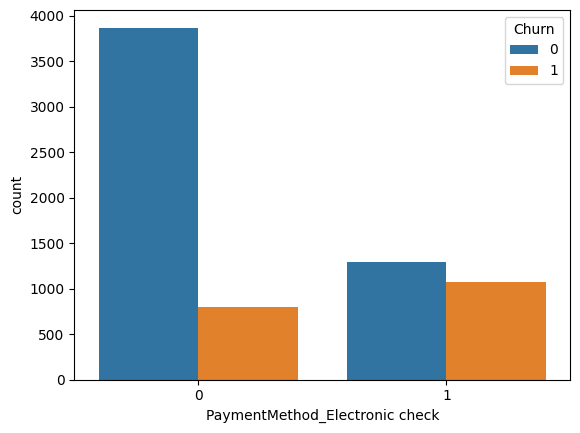

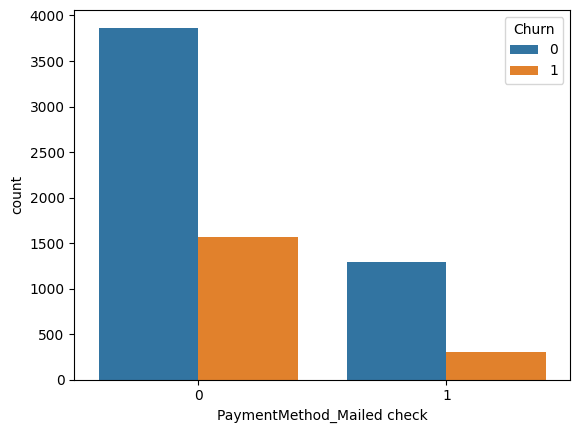

In [20]:
for i, predictor in enumerate(Data1.drop(columns=['Churn','TotalCharges','MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(x=predictor,data=Data1,hue='Churn')

# Checking relationship between totalcharges and monthly charges

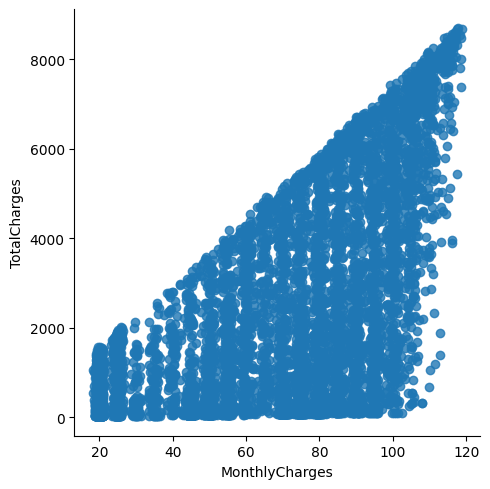

In [21]:
sns.lmplot(x='MonthlyCharges',y='TotalCharges',data=Data1,fit_reg=False)

# Model building
#

# Validation Dataset

We will use 70% of the dataset for modeling and hold back 30% for Test/Validation.

In [22]:
# Split-out validation dataset
x = Data1.drop('Churn',axis=1)
y = Data1['Churn']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=42)

Balancing the data set using smote  for imbalance handling

In [23]:
smote=SMOTE()
x_smote, y_smote = smote.fit_resample(x_train,y_train)
print("unbalanced dataset shape", len(y_train))
print("after SMOTE resampling", len(y_smote))


unbalanced dataset shape 4922
after SMOTE resampling 7228


In [24]:
# KNN model
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print('Accuracy score:', accuracy_score(y_test, y_pred))


Accuracy score: 0.771090047393365


In [25]:
# Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(x_train, y_train)
y_pred = log_reg.predict(x_test)
print('Accuracy score (Logistic Regression):', accuracy_score(y_test, y_pred))


Accuracy score (Logistic Regression): 0.79478672985782


In [ ]:
# Train the SVM model-LINEAR FUNCTION
from sklearn.metrics import classification_report,confusion_matrix
svm = SVC(kernel='linear')
svm.fit(x_train, y_train)
y_pred = svm.predict(x_test)
print('Accuracy score (SVM):', accuracy_score(y_test, y_pred))
print('Classification report (SVM):', classification_report(y_test, y_pred))
print('Confusion matrix (SVM):', confusion_matrix(y_test, y_pred))

In [ ]:
# SVM model SIGMOID FUNCTON
svm = SVC(kernel='sigmoid')
svm.fit(x_train, y_train)
y_pred = svm.predict(x_test)
print('Accuracy score (SVM- SIGMOID):', accuracy_score(y_test, y_pred))
print('Classification report (SVM- SIGMOID):', classification_report(y_test, y_pred))
print('Confusion matrix (SVM- SIGMOID):', confusion_matrix(y_test, y_pred))



In [ ]:
# DECESION TREE MODEL
decesiontree = DecisionTreeClassifier(random_state=42)
decesiontree.fit(x_train, y_train)
y_pred = decesiontree.predict(x_test)
print('Accuracy score (DECESION TREE):', accuracy_score(y_test, y_pred))
print('Classification report (DECESION TREE):', classification_report(y_test, y_pred))
print('Confusion matrix (DECESION TREE):', confusion_matrix(y_test, y_pred))



In [ ]:
#  Gaussian Naive Bayes classifier
gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred = gnb.predict(x_test)
print('Accuracy score (Gaussian Naive Bayes):', accuracy_score(y_test, y_pred))
print('Classification report (Gaussian Naive Bayes):', classification_report(y_test, y_pred))
print('Confusion matrix (Gaussian Naive Bayes):', confusion_matrix(y_test, y_pred))


FROM ABOVE RESULTS WE CAN SEE THAT ONLY 3 MODELS ARE PERFORMING WELL I.E LOGISTIC  REGRESSION, KNN, AND SVM(WITH LINEAR FUNCTION)

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42, replacement=True)

x_rus, y_rus = rus.fit_resample(x, y)

print('BEFORE RUS:', len(y))
print('AFTER RUS:', len(y_rus))

In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy='minority')

x_ros, y_ros = ros.fit_resample(x, y)

print('Original dataset shape:', len(y))
print('Resample dataset shape:', len(y_ros))

In [ ]:
#  Logistic Regression model with RandomOverSampler
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(x_ros, y_ros)

y_pred = log_reg.predict(x_test)
print('Accuracy score (Logistic Regression with RandomOverSampler):', accuracy_score(y_test, y_pred))
print('Classification report (Logistic Regression with RandomOverSampler):', classification_report(y_test, y_pred))
print('Confusion matrix (Logistic Regression with RandomOverSampler):', confusion_matrix(y_test, y_pred))



In [ ]:
#  KNN model with RandomOverSampler
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_ros, y_ros)
y_pred = knn.predict(x_test)
print('Accuracy score (KNN with RandomOverSampler):', accuracy_score(y_test, y_pred))
print('Classification report (KNN with RandomOverSampler):', classification_report(y_test, y_pred))
print('Confusion matrix (KNN with RandomOverSampler):', confusion_matrix(y_test, y_pred))


In [ ]:
# SVM model with RandomOverSampler
from sklearn.svm import SVC
svm = SVC(kernel='linear')
svm.fit(x_ros, y_ros)

y_pred = svm.predict(x_test)

print('Accuracy score (SVM with RandomOverSampler):',accuracy_score(y_ros, y_pred))
print('Classification report (SVM with RandomOverSampler):', classification_report(y_test, y_pred))
print('Confusion matrix (SVM with RandomOverSampler):', confusion_matrix(y_test, y_pred))


In [ ]:

# Logistic Regression with RandomOverSampler
log_reg = LogisticRegression(max_iter=1000)
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_ros, y_ros)
print('Best parameters lOGISTIC REGRESSION RANDOMOVERSAMPLER:', grid_search.best_params_)
print('Best score lOGISTIC REGRESSION RANDOMOVERSAMPLER:', grid_search.best_score_)
# KNN with RandomOverSampler
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': range(1, 21)}
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_ros, y_ros)
print('Best parameters n_neighbors:', grid_search.best_params_)
print('Best score n_neighbors:', grid_search.best_score_)
# SVM with RandomOverSampler
#svm = SVC(kernel='linear')
#param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
#grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')
#grid_search.fit(x_ros, y_ros)
#print('Best parameters GridSearchCV:', grid_search.best_params_)
#print('Best score GridSearchCV:', grid_search.best_score_)
# Logistic Regression with RandomUnderSampler
log_reg = LogisticRegression(max_iter=1000)
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_rus, y_rus)
print('Best parameters Logistic Regression with RandomUnderSampler:', grid_search.best_params_)
print('Best score Logistic Regression with RandomUnderSampler:', grid_search.best_score_)
# KNN with RandomUnderSampler
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': range(1, 21)}
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_rus, y_rus)
print('Best parameters KNN with RandomUnderSampler:', grid_search.best_params_)
print('Best score KNN with RandomUnderSampler:', grid_search.best_score_)
# SVM with RandomUnderSampler
#svm = SVC(kernel='linear')
#param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
#grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')
#grid_search.fit(x_rus, y_rus)
#print('Best parameters SVM with RandomUnderSampler:', grid_search.best_params_)
#print('Best score SVM with RandomUnderSampler:', grid_search.best_score_)
# Logistic Regression with unbalanced data
log_reg = LogisticRegression(max_iter=1000)
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)
print('Best parameters Logistic Regression with unbalanced data:', grid_search.best_params_)
print('Best score Logistic Regression with unbalanced data:', grid_search.best_score_)
# KNN with unbalanced data
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': range(1, 21)}
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)
print('Best parameters KNN with unbalanced data:', grid_search.best_params_)
print('Best score KNN with unbalanced data:', grid_search.best_score_)
# SVM with unbalanced data
#svm = SVC(kernel='linear')
#param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
#grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')
#grid_search.fit(x_train, y_train)
#print('Best parameters:', grid_search.best_params_)
#print('Best score:', grid_search.best_score_)


# Evaluating Baseline Models

We are going to make simple kfold cross validation accross models and see what works the best for the data.

In [ ]:
# Test options and evaluation metric
num_folds = 10
scoring = 'accuracy'

Let's create a baseline of performance on this problem and spot-check a number of different algorithms. We will select a suite of different algorithms capable of working on this classification problem. The algorithms selected include:
1. Linear Algorithms: Logistic Regression (LR)
2. Nonlinear Algorithms: Classiffication and Regression Trees (CART),k-Nearest Neighbors (KNN),Naive Bayes and Support Vector Classifier (SVC)

We suspect that the differing scales of the raw data may be negatively impacting the skill of some of the algorithms.

Let's evaluate the  algorithms with a standardized copy of the dataset.

This is where the data is transformed such that each attribute has a mean value of zero and a standard deviation of 1.

We also need to avoid data leakage when we transform the data.

A good way to avoid leakage is to use pipelines that standardize the data and build the model for each fold in the cross-validation test harness.

That way we can get a fair estimation of how each model with standardized data might perform on unseen data.

In [ ]:
# Standardize the dataset
pipelines = []
pipelines.append(('LR', Pipeline([('Scaler', StandardScaler()), ('LR', LogisticRegression())])))
pipelines.append(('KNN', Pipeline([('Scaler', StandardScaler()), ('KNN', KNeighborsClassifier())])))
pipelines.append(('CART', Pipeline([('Scaler', StandardScaler()), ('CART', DecisionTreeClassifier())])))
pipelines.append(('NB', Pipeline([('Scaler', StandardScaler()), ('NB', GaussianNB())])))
pipelines.append(('SVC', Pipeline([('Scaler', StandardScaler()), ('SVC', SVC())])))

In [ ]:
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=42, shuffle=True)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

In [ ]:
# Compare Algorithms
fig = plt.figure(figsize=(6,6))
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Logistic Regression and SVC has the best accuracy with minimum standard deviation.

Lets see whethere we can improve the same with tuning.

# Improve Results With Tuning

In [ ]:
# SVC tuning
scaler = StandardScaler().fit(x_train)
scaledx = scaler.transform(x_train)
scaledtest=scaler.transform(x_test)

c_values = np.arange(1,5)
kernel=['linear','rbf']
param_grid = dict(C=c_values,kernel=kernel)
model_svc=SVC()
kfold = KFold(n_splits=num_folds, random_state=42, shuffle=True)
grid_svc = GridSearchCV(estimator=model_svc, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result_svc = grid_svc.fit(scaledx, y_train)

In [ ]:
grid_result_svc.score(scaledx,y_train)

With Tuning the accuracy of SVC is increased by 2%.

Now we will check the test score.

In [ ]:
grid_result_svc.score(scaledtest,y_test)

The model is almost a perfect fit.

In [ ]:
# DecesionTreee Tuning

scaler = StandardScaler().fit(x_train)
scaledx = scaler.transform(x_train)
scaledtest=scaler.transform(x_test)

max_depth= np.arange(1,8)
max_features=np.arange(1,45)
min_samples_split=np.arange(2,6)
param_grid = dict(max_depth=max_depth,max_features=max_features,min_samples_split=min_samples_split)
model_dt=DecisionTreeClassifier()
kfold = KFold(n_splits=num_folds, random_state=42, shuffle=True)
grid_dt = GridSearchCV(estimator=model_dt, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result_dt = grid_dt.fit(scaledx, y_train)

In [ ]:
grid_result_dt.score(scaledx,y_train)

The accuracy is improved by 8 % but still it is lower than SVC.

We will check the test score.

In [ ]:
grid_result_dt.score(scaledtest,y_test)

There is a slight over fit.

In [ ]:
# Logistic regression Tuning

scaler = StandardScaler().fit(x_train)
scaledx = scaler.transform(x_train)
scaledtest=scaler.transform(x_test)

c_values = np.arange(2**-5,2**5)
param_grid = dict(C=c_values)
model_lr=LogisticRegression()
kfold = KFold(n_splits=num_folds, random_state=42, shuffle=True)
grid_lr = GridSearchCV(estimator=model_lr, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result_lr = grid_lr.fit(scaledx, y_train)

In [ ]:
grid_result_lr.score(scaledx,y_train)

There isnt a much improvement in the score.

We wil check the test score.

In [ ]:
grid_result_lr.score(scaledtest,y_test)

We can see that the model is great with perfect fit.

# Ensemble Methods

Another way that we can improve the performance of algorithms on this problem is by using ensemble methods.

We will evaluate two different ensemble machine learning algorithms, one boosting and one bagging method:

1. Boosting Methods: AdaBoost (AB),GradientBoost (GB)
2. Bagging Methods: Random Forests (RF), Bagging (BG)

In [ ]:
# ensembles
ensembles = []
ensembles.append(('AB', Pipeline([('Scaler', StandardScaler()),('AB', AdaBoostClassifier())])))
ensembles.append(('GB', Pipeline([('Scaler', StandardScaler()),('GB', GradientBoostingClassifier())])))
ensembles.append(('RF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestClassifier())])))
ensembles.append(('Bag', Pipeline([('Scaler', StandardScaler()),('Bag',BaggingClassifier())])))

In [ ]:
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=42,shuffle=True)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

In [ ]:
# Compare Algorithms
fig = plt.figure(figsize=(6,6))
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Adaboost and GradientBoost ensemble gives the best results.

We will try imporvingg the score further by tuning.

In [ ]:
# Adaboost Tuning

scaler = StandardScaler().fit(x_train)
scaledx = scaler.transform(x_train)
scaledtest=scaler.transform(x_test)
base_estimator=[LogisticRegression(C=6.03125, class_weight=None, dual=False,
                fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)]
n_estimators=np.arange(1,51)
param_grid = dict(base_estimator=base_estimator,n_estimators=n_estimators)
model_ab=AdaBoostClassifier()
kfold = KFold(n_splits=num_folds, random_state=42,shuffle=True)
grid_ab = GridSearchCV(estimator=model_ab, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result_ab = grid_ab.fit(scaledx, y_train)

In [ ]:
grid_ab.score(scaledx,y_train)

There is a slight increase of 0.4 %.

In [ ]:
grid_ab.score(scaledtest,y_test)

Model is almost perfect fit.

In [ ]:
# GradientBoost Tuning

scaler = StandardScaler().fit(x_train)
scaledx = scaler.transform(x_train)
scaledtest=scaler.transform(x_test)


n_estimators=np.arange(1,101)
param_grid = dict(n_estimators=n_estimators)
model_gb=GradientBoostingClassifier()
kfold = KFold(n_splits=num_folds, random_state=42,shuffle=True)
grid_gb = GridSearchCV(estimator=model_ab, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result_gb = grid_gb.fit(scaledx, y_train)

In [ ]:
grid_gb.score(scaledx, y_train)

There is 0.1% increase in the accuracy.

In [ ]:
grid_gb.score(scaledtest, y_test)

Model is at the right fit.

In [ ]:
results=pd.DataFrame(index=['Logistic Regression',
                            'Decision Tree','Support Vector Classifier',
                            'Adaboost Classifier','Gradientboost Classifier'])

In [ ]:
results['Train']=[grid_result_lr.score(scaledx,y_train),
                  grid_result_dt.score(scaledx,y_train),
                  grid_result_svc.score(scaledx,y_train),
                  grid_result_ab.score(scaledx,y_train),
                  grid_result_gb.score(scaledx,y_train)]

In [ ]:
results['Test']=[grid_result_lr.score(scaledtest,y_test),
                  grid_result_dt.score(scaledtest,y_test),
                  grid_result_svc.score(scaledtest,y_test),
                  grid_result_ab.score(scaledtest,y_test),
                  grid_result_gb.score(scaledtest,y_test)]

In [ ]:
results